In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# 1. Linear Classifier

In [24]:
# Download the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape,'\n')

# Classes
K = len(np.unique(y_train)) 

# Data Parameters
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

# Covert labels to binary classes
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

# Reshape the data
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train reshaped:', x_train.shape)
print('y_train reshaped:',y_train.shape)
print('x_test reshaped:',x_test.shape)
print('y_test reshaped:',y_test.shape)


x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1) 

x_train reshaped: (50000, 3072)
y_train reshaped: (50000, 10)
x_test reshaped: (10000, 3072)
y_test reshaped: (10000, 10)


In [25]:
# Initialize weights
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros((1,K))
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr

# Initialize parameters for linear model
iterations = 300
lr = 0.014
lr_decay = 0.999
reg = 5e-6 # Regularization parameter - Lambda

# Initialize lists to store history
loss_history = []
loss_history_test = []
train_acc_history = []
val_acc_history = []

w1: (3072, 10)
b1: (1, 10)


### Functions - Linear Model

In [2]:
def LinearLoss(y_p,Y,w1,reg,w2=0):
    # Calculates loss using the mean sum of squared errors
    dy = y_p - Y # Difference
    batch_size = y_p.shape[0]
    return (1/batch_size)*np.sum(np.square(dy)) + np.sum(w1**2)*reg + np.sum(w2**2)*reg

In [3]:
def ForwardProp(X,w1,b1):
    # Implements the forward pass of the linear model
    return np.matmul(X,w1)+b1

In [4]:
def BackProp(X,Y,y_p,nn,w_1,w_2=0,h=0):
    # Calculates dw1 and db1
    if nn:
        dy = 2*(y_p-Y)/Y.shape[0] # Derivative
        db2 = np.sum(dy,axis=0)
        dw2 = np.matmul(h.T,dy) + 2*w_2*reg
        dh = np.matmul(dy,w_2.T)
        db1 = np.sum(dh*h*(1-h),axis=0)
        dw1 = np.matmul(X.T,dh*h*(1-h)) + 2*w_1*reg
        return dw1,db1,dw2,db2

    else:
        dy = 2*(y_p-Y)/X.shape[0]# Derivative
        dw = np.matmul(X.T,dy)+2*w_1*reg  ; db = np.sum(dy,axis=0)
        return dw,db

In [5]:
def GradDescent(w1,b1,dw,db,lr,lr_decay):
    # Updates weights and learning rate
    w1 -= dw*lr ;  b1 -= db*lr ; lr *= lr_decay
    return w1,b1,lr

In [6]:
def Accuracy(Y,y_p):
    # Returns a similarity figure of accuracy
    y_p_in = np.argmax(y_p,axis=1)
    y_class = np.argmax(Y,axis=1)
    return np.sum(y_p_in==y_class)*100/y_class.size

In [26]:
# Implement linear classification

seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(1,iterations+1):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    
    # Forward pass
    X = x_train[indices]
    Y = y_train[indices]
    
    y_p = ForwardProp(X,w1,b1)

    # Calculate training loss for each iteration
    loss = LinearLoss(y_p,Y,w1,reg)

    if not(t%10):print('Iteration :',t,'---------- loss',loss)
    
    # Test set -----------------------------------------------
    y_pt = ForwardProp(x_test,w1,b1)

    # Calculate test loss for each iteration
    loss_t = LinearLoss(y_pt,y_test,w1,reg)
    # --------------------------------------------------------

    # Update history
    loss_history.append(loss)
    loss_history_test.append(loss_t)
    train_acc_history.append(Accuracy(Y,y_p))
    val_acc_history.append(Accuracy(y_test,y_pt))

    # Backward pass
    dw,db = BackProp(X,Y,y_p,False,w1)

    # Perform Gradient Descent
    w1,b1,lr = GradDescent(w1,b1,dw,db,lr,lr_decay)


Iteration : 10 ---------- loss 0.8815316771027358
Iteration : 20 ---------- loss 0.8450754918435652
Iteration : 30 ---------- loss 0.8250828930790705
Iteration : 40 ---------- loss 0.813278242276418
Iteration : 50 ---------- loss 0.8059895837998607
Iteration : 60 ---------- loss 0.8012801335323735
Iteration : 70 ---------- loss 0.7980832318189321
Iteration : 80 ---------- loss 0.7957979279680858
Iteration : 90 ---------- loss 0.794079219754375
Iteration : 100 ---------- loss 0.7927252666546655
Iteration : 110 ---------- loss 0.7916155197879102
Iteration : 120 ---------- loss 0.7906762701789611
Iteration : 130 ---------- loss 0.789861213504123
Iteration : 140 ---------- loss 0.7891403506043679
Iteration : 150 ---------- loss 0.7884935699483939
Iteration : 160 ---------- loss 0.7879068886148112
Iteration : 170 ---------- loss 0.7873702189421721
Iteration : 180 ---------- loss 0.7868760202157985
Iteration : 190 ---------- loss 0.7864184696336332
Iteration : 200 ---------- loss 0.785992941

In [31]:
# Printing accuracies and losses

print("Learning Rate:", lr)
print("Training Set Loss:", loss_history[-1])
print("Test Set Loss:", loss_history_test[-1])
print("Train Accuracy:",train_acc_history[-1])
print("Test Accuracy:",val_acc_history[-1])

Learning Rate: 0.014
Training Set Loss: 0.7829012320687659
Test Set Loss: 0.7876166265897434
Train Accuracy: 41.95
Test Accuracy: 40.57


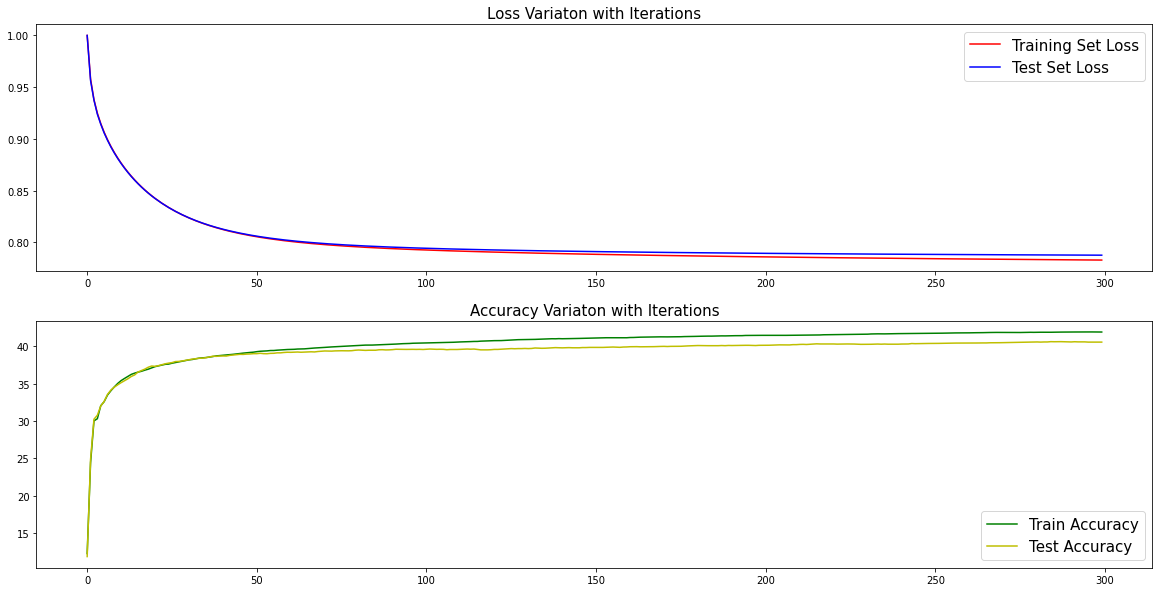

In [115]:
# Visualizing the loss/accuracy variation over iterations

fig,ax = plt.subplots(2,1,figsize=(20,10))

ax[0].plot(loss_history,color="r")
ax[0].plot(loss_history_test,color="b")
ax[0].set_title('Loss Variaton with Iterations',fontsize= 15)
ax[0].legend(['Training Set Loss','Test Set Loss'],fontsize= 15)

ax[1].plot(train_acc_history,color="g")
ax[1].plot(val_acc_history,color="y")
ax[1].set_title('Accuracy Variaton with Iterations',fontsize= 15)
ax[1].legend(['Train Accuracy','Test Accuracy'],fontsize= 15)

plt.savefig("Img_a4/LinearHistory.tif")

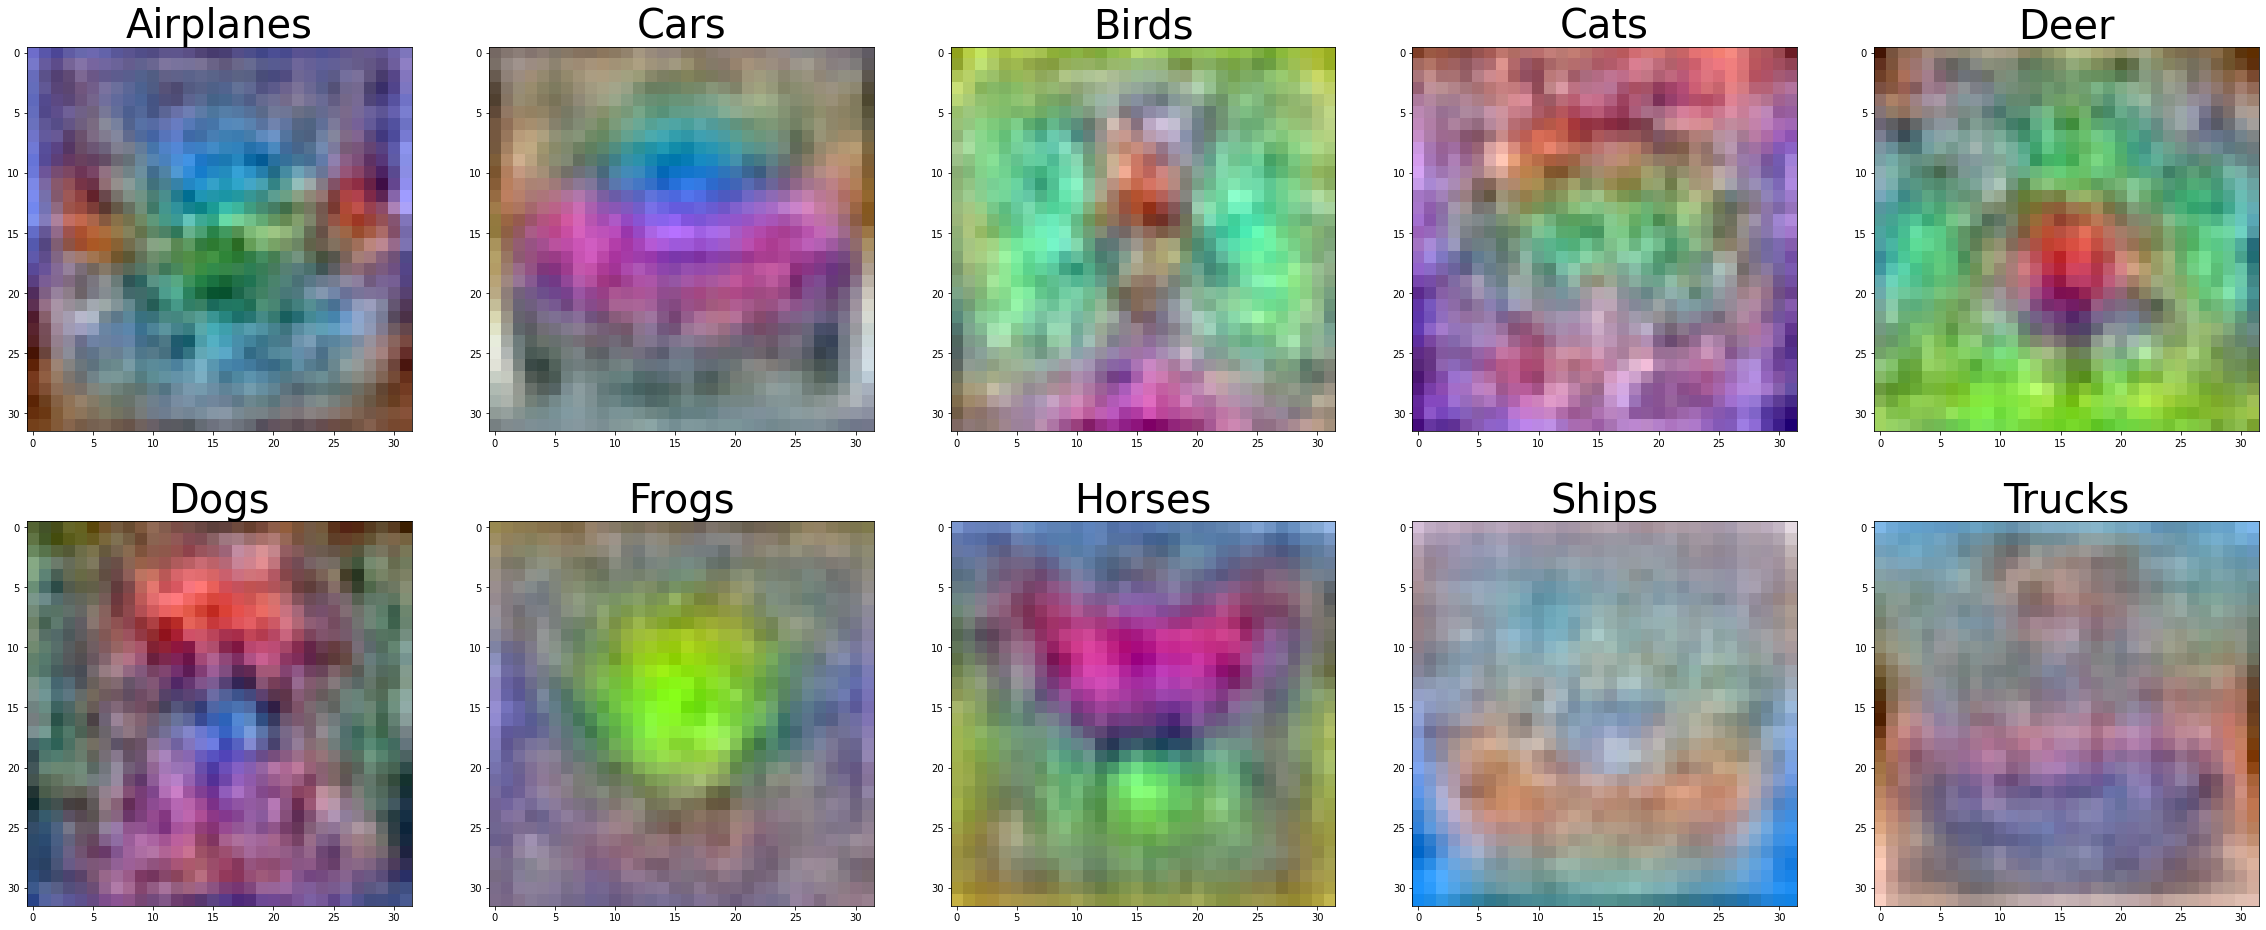

In [116]:
classifiers = []

# Reshape and normalize w1 to obtain classifiers
for i in range(w1.shape[1]):
    img = np.reshape(w1[:,i]*255,(32,32,3))
    classifiers.append(cv.normalize(img, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U))

# Class labels
classes = [['Airplanes','Cars','Birds','Cats','Deer'],['Dogs','Frogs','Horses','Ships','Trucks']]

# Display w1 as images
fig,ax = plt.subplots(2,5,figsize=(40,16))

for i in range(2):
    for j in range(5):
        ax[i,j].set_title(classes[i][j],fontsize= 40)
        ax[i,j].imshow(classifiers[5*i+j],vmin=0,vmax=255)

plt.savefig("Img_a4/LinearClassifiers.tif")
plt.show()

# 2. 2-Layer Neural Network

In [7]:
# Activation for the nn
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [8]:
# Download the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape,'\n')

# Classes
K = len(np.unique(y_train)) 

# Data Parameters
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

# Normalize pixel values
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

# Covert labels to binary classes
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

# Reshape the data
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train reshaped:', x_train.shape)
print('y_train reshaped:',y_train.shape)
print('x_test reshaped:',x_test.shape)
print('y_test reshaped:',y_test.shape)


x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1) 

x_train reshaped: (50000, 3072)
y_train reshaped: (50000, 10)
x_test reshaped: (10000, 3072)
y_test reshaped: (10000, 10)


In [34]:
# Initialize weights
H = 200
w_1 = std*np.random.randn(Din, H)
b_1 = np.zeros((1,H))
w_2 = std*np.random.randn(H, K)
b_2 = np.zeros((1,K))

print("w1 for nn:", w_1.shape)
print("b1 for nn:", b_1.shape)
print("w2 for nn:", w_2.shape)
print("b2 for nn:", b_2.shape)

# Initialize parameters for linear model
iterations = 300
lr = 0.014
lr_decay = 0.999
reg = 5e-6 # Regularization parameter - Lambda

# Initialize lists to store history
loss_history_nn = []
loss_history_nn_test = []
train_acc_history_nn = []
val_acc_history_nn = []


w1 for nn: (3072, 200)
b1 for nn: (1, 200)
w2 for nn: (200, 10)
b2 for nn: (1, 10)


In [35]:
# Implement 2-layer nn

for t in range(1,iterations+1):
    indices = np.arange(Ntr)
    rng.shuffle(indices)

    # Forward pass
    Xi = x_train[indices]
    Yi = y_train[indices]
    
    h = sigmoid(np.matmul(Xi,w_1)+b_1)
    y_nn = ForwardProp(h,w_2,b_2)

    loss = LinearLoss(y_nn,Yi,w_1,reg,w_2)

    if not(t%10):print('Iterations :',t,'---------- loss',loss)
    
    # Test set -----------------------------------------------
    h_t = sigmoid(np.matmul(x_test,w_1)+b_1)
    y_pt = ForwardProp(h_t,w_2,b_2)

    # Calculate test loss for each iteration
    loss_t = LinearLoss(y_pt,y_test,w_1,reg,w_2)
    # --------------------------------------------------------

    # Update history
    loss_history_nn.append(loss)
    loss_history_nn_test.append(loss_t)
    train_acc_history_nn.append(Accuracy(Yi,y_nn))
    val_acc_history_nn.append(Accuracy(y_test,y_pt))

    # Backward pass
    dw1,db1,dw2,db2 = BackProp(Xi,Yi,y_nn,True,w_1,w_2,h) 

    # Perform Gradient Descent
    w_1,b_1,lr = GradDescent(w_1,b_1,dw1,db1,lr,lr_decay)
    lr /= lr_decay
    w_2,b_2,lr = GradDescent(w_2,b_2,dw2,db2,lr,lr_decay)


Iterations : 10 ---------- loss 0.8769436153028382
Iterations : 20 ---------- loss 0.8436299661396439
Iterations : 30 ---------- loss 0.8338904256295397
Iterations : 40 ---------- loss 0.8216982868591384
Iterations : 50 ---------- loss 0.8097222255144219
Iterations : 60 ---------- loss 0.8068331095501258
Iterations : 70 ---------- loss 0.7999091719063263
Iterations : 80 ---------- loss 0.7983249417072429
Iterations : 90 ---------- loss 0.789333041706233
Iterations : 100 ---------- loss 0.7835771454631051
Iterations : 110 ---------- loss 0.777943860216423
Iterations : 120 ---------- loss 0.7786725365123109
Iterations : 130 ---------- loss 0.7836657093749835
Iterations : 140 ---------- loss 0.7691921650613701
Iterations : 150 ---------- loss 0.7701731191068811
Iterations : 160 ---------- loss 0.7626404267797341
Iterations : 170 ---------- loss 0.756789915059634
Iterations : 180 ---------- loss 0.7576852882523619
Iterations : 190 ---------- loss 0.7565796513976316
Iterations : 200 -------

In [36]:
# Printing accuracies and losses

print("Learning Rate:", lr)
print("Training Set Loss For NN:", loss_history_nn[-1])
print("Test Set Loss For NN:", loss_history_nn_test[-1])
print("Train Accuracy For NN:",train_acc_history_nn[-1])
print("Test Accuracy For NN:",val_acc_history_nn[-1])

Learning Rate: 0.010369898450185398
Training Set Loss For NN: 0.7375014063267552
Test Set Loss For NN: 0.7618681772235865
Train Accuracy For NN: 46.06
Test Accuracy For NN: 42.43


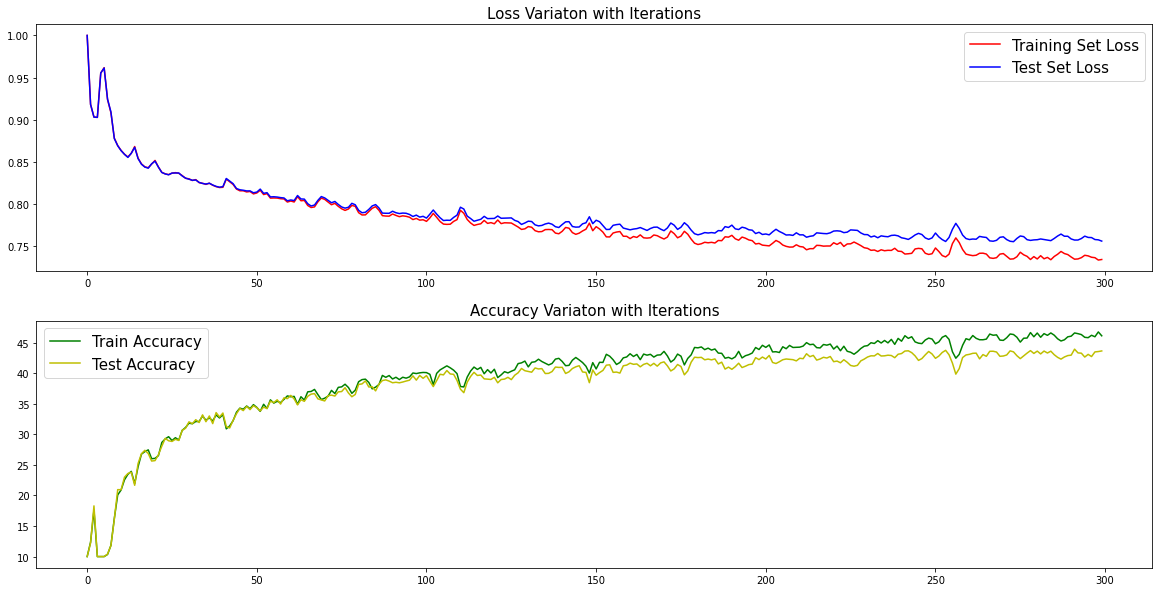

In [130]:
# Visualizing the loss/accuracy variation over iterations

fig,ax = plt.subplots(2,1,figsize=(20,10))

ax[0].plot(loss_history_nn,color="r")
ax[0].plot(loss_history_nn_test,color="b")
ax[0].set_title('Loss Variaton with Iterations',fontsize= 15)
ax[0].legend(['Training Set Loss','Test Set Loss'],fontsize= 15)

ax[1].plot(train_acc_history_nn,color="g")
ax[1].plot(val_acc_history_nn,color="y")
ax[1].set_title('Accuracy Variaton with Iterations',fontsize= 15)
ax[1].legend(['Train Accuracy','Test Accuracy'],fontsize= 15)

plt.savefig("Img_a4/NNHistory.tif")

# 3. Stochastic Gradient Descent

In [15]:
# Initialize weights
H = 200
w_s1 = std*np.random.randn(Din, H)
b_s1 = np.zeros((1,H))
w_s2 = std*np.random.randn(H, K)
b_s2 = np.zeros((1,K))

print("w1 for st:", w_s1.shape)
print("b1 for st:", b_s1.shape)
print("w2 for st:", w_s2.shape)
print("b2 for st:", b_s2.shape)

# Initialize parameters for linear model
iterations = 300
lr = 0.014
lr_decay = 0.999
reg = 5e-6 # Regularization parameter - Lambda

batchsize = 500
batch_iter = Ntr//batchsize

# Initialize lists to store history
loss_history_st = []
loss_history_st_test = []
train_acc_history_st = []
val_acc_history_st = []


w1 for st: (3072, 200)
b1 for st: (1, 200)
w2 for st: (200, 10)
b2 for st: (1, 10)


In [19]:
for t in range(1,iterations+1):
    indices = np.random.choice(Ntr,batchsize)
    rng.shuffle(indices)

    # Forward pass
    Xs=x_train[indices]
    Ys=y_train[indices]

    h = sigmoid(np.matmul(Xs,w_s1)+b_s1)
    y_b = ForwardProp(h,w_s2,b_s2)

    loss_s = LinearLoss(y_b,Ys,w_s1,reg,w_s2)

    if not(t%10):print('Iterations :',t,'---------- loss',loss_s)
 
    # Test set -----------------------------------------------
    h_t = sigmoid(np.matmul(x_test,w_s1)+b_s1)
    y_st = ForwardProp(h_t,w_s2,b_s2) 

    # Calculate test loss for each iteration
    loss_st = LinearLoss(y_st,y_test,w_s1,reg,w_s2)
    # --------------------------------------------------------

    # Update history
    loss_history_st.append(loss_s)
    loss_history_st_test.append(loss_st)
    train_acc_history_st.append(Accuracy(Ys,y_b))
    val_acc_history_st.append(Accuracy(y_test,y_st))

    # Backward pass
    dws1,dbs1,dws2,dbs2 = BackProp(Xs,Ys,y_b,True,w_s1,w_s2,h) 

    # Perform Gradient Descent
    w_s1,b_s1,lr = GradDescent(w_s1,b_s1,dws1,dbs1,lr,lr_decay)
    lr /= lr_decay
    w_s2,b_s2,lr = GradDescent(w_s2,b_s2,dws2,dbs2,lr,lr_decay)
        

Iterations : 10 ---------- loss 0.8758986563709639
Iterations : 20 ---------- loss 0.8505315231034817
Iterations : 30 ---------- loss 0.8267830074294602
Iterations : 40 ---------- loss 0.8313168493675068
Iterations : 50 ---------- loss 0.8170975559995148
Iterations : 60 ---------- loss 0.8175308274628795
Iterations : 70 ---------- loss 0.8081038823386392
Iterations : 80 ---------- loss 0.7965158561230579
Iterations : 90 ---------- loss 0.801359869853358
Iterations : 100 ---------- loss 0.7837573014211723
Iterations : 110 ---------- loss 0.8018545867355634
Iterations : 120 ---------- loss 0.8071449997398117
Iterations : 130 ---------- loss 0.78276327280546
Iterations : 140 ---------- loss 0.7660730238991433
Iterations : 150 ---------- loss 0.7863509634453674
Iterations : 160 ---------- loss 0.776310410116991
Iterations : 170 ---------- loss 0.774751714339723
Iterations : 180 ---------- loss 0.7912742202777611
Iterations : 190 ---------- loss 0.7608118167367097
Iterations : 200 ---------

In [20]:
# Printing accuracies and losses

print("Learning Rate:", lr)
print("Training Set Loss For SGD:", loss_history_st[-1])
print("Test Set Loss For SGD:", loss_history_st_test[-1])
print("Train Accuracy For SGD:",train_acc_history_st[-1])
print("Test Accuracy For SGD:",val_acc_history_st[-1])

Learning Rate: 0.010369898450185398
Training Set Loss For SGD: 0.723303987591596
Test Set Loss For SGD: 0.7636226152900957
Train Accuracy For SGD: 46.6
Test Accuracy For SGD: 42.05


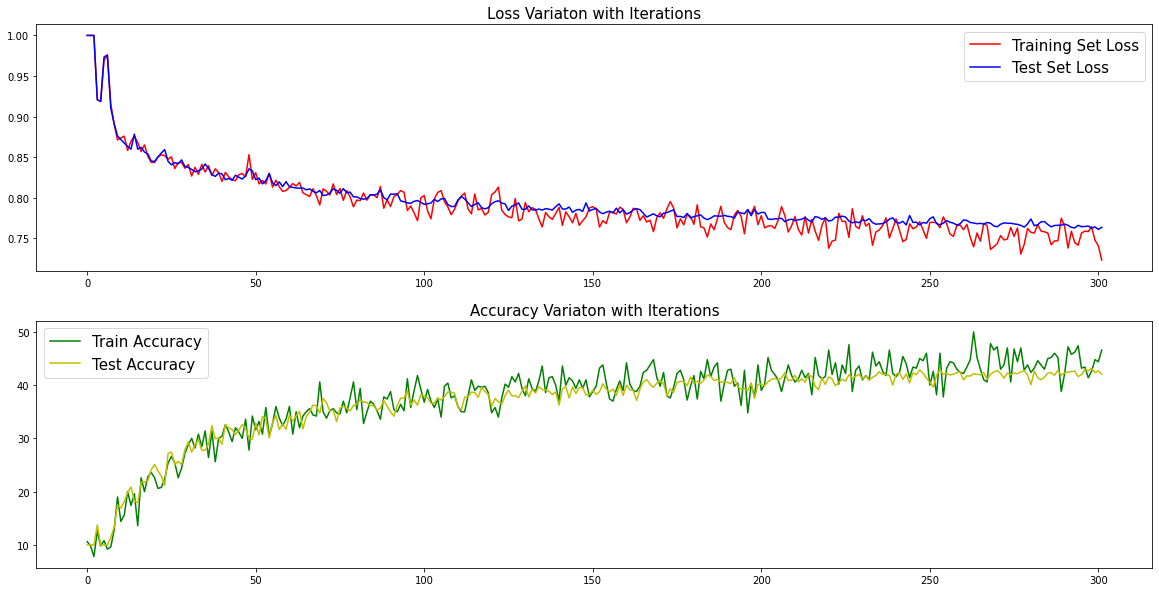

In [21]:
# Visualizing the loss/accuracy variation over iterations

fig,ax = plt.subplots(2,1,figsize=(20,10))

ax[0].plot(loss_history_st,color="r")
ax[0].plot(loss_history_st_test,color="b")
ax[0].set_title('Loss Variaton with Iterations',fontsize= 15)
ax[0].legend(['Training Set Loss','Test Set Loss'],fontsize= 15)

ax[1].plot(train_acc_history_st,color="g")
ax[1].plot(val_acc_history_st,color="y")
ax[1].set_title('Accuracy Variaton with Iterations',fontsize= 15)
ax[1].legend(['Train Accuracy','Test Accuracy'],fontsize= 15)

plt.savefig("Img_a4/SGDHistory.tif")

## STOCHASTIC II

In [9]:
# Download the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape,'\n')

# Classes
K = len(np.unique(y_train)) 

# Data Parameters
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

# Normalize pixel values
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

# Covert labels to binary classes
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

# Reshape the data
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train reshaped:', x_train.shape)
print('y_train reshaped:',y_train.shape)
print('x_test reshaped:',x_test.shape)
print('y_test reshaped:',y_test.shape)

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1) 

x_train reshaped: (50000, 3072)
y_train reshaped: (50000, 10)
x_test reshaped: (10000, 3072)
y_test reshaped: (10000, 10)


In [16]:
# Initialize weights
std=1e-5
H = 200
w_s1 = std*np.random.randn(Din, H)
b_s1 = np.zeros((1,H))
w_s2 = std*np.random.randn(H, K)
b_s2 = np.zeros((1,K))

print("w1 for st:", w_s1.shape)
print("b1 for st:", b_s1.shape)
print("w2 for st:", w_s2.shape)
print("b2 for st:", b_s2.shape)

# Initialize parameters for linear model
iterations = 300
lr = 0.014
lr_decay = 0.999
reg = 5e-6 # Regularization parameter - Lambda

batchsize = 500
batch_iter = Ntr//batchsize

# Initialize lists to store history
loss_history_st = []
loss_history_st_test = []
train_acc_history_st = []
val_acc_history_st = []

w1 for st: (3072, 200)
b1 for st: (1, 200)
w2 for st: (200, 10)
b2 for st: (1, 10)


In [16]:
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(1,iterations+1):
    indices = np.arange(Ntr)
    rng.shuffle(indices)

    # Forward pass
    Xs = x_train[indices]
    Ys = y_train[indices]

    for iter in range(batch_iter):
        batch = Xs[batchsize*iter:batchsize*(iter+1)]
        batchy = Ys[batchsize*iter:batchsize*(iter+1)] 

        h = sigmoid(np.matmul(batch,w_s1)+b_s1)
        y_b = ForwardProp(h,w_s2,b_s2)

        loss_s = LinearLoss(y_b,batchy,w_s1,reg,w_s2)
        loss_history_st.append(loss_s)

        # Backward pass
        dws1,dbs1,dws2,dbs2 = BackProp(batch,batchy,y_b,True,w_s1,w_s2,h) 

        # Perform Gradient Descent
        w_s1,b_s1,lr = GradDescent(w_s1,b_s1,dws1,dbs1,lr,lr_decay)
        lr /= lr_decay
        w_s2,b_s2,lr = GradDescent(w_s2,b_s2,dws2,dbs2,lr,lr_decay)
        lr /= lr_decay

    lr *= lr_decay

    # Train set
    h = sigmoid(np.matmul(Xs,w_s1)+b_s1)
    y_st = ForwardProp(h,w_s2,b_s2)    
    
    # Test set 
    h_t = sigmoid(np.matmul(x_test,w_s1)+b_s1)
    y_stt = ForwardProp(h_t,w_s2,b_s2) 

    # Update history
    train_acc_history_st.append(Accuracy(Ys,y_st))
    val_acc_history_st.append(Accuracy(y_test,y_stt))

    if not(t%10):print('iterations \t:',t,'---------- loss',loss_s)

iterations 	: 10 ---------- loss 0.6093405505753136
iterations 	: 20 ---------- loss 0.6058691877964499
iterations 	: 30 ---------- loss 0.5494389666078233
iterations 	: 40 ---------- loss 0.5734709202218824
iterations 	: 50 ---------- loss 0.5413709780313063
iterations 	: 60 ---------- loss 0.5080609223476699
iterations 	: 70 ---------- loss 0.5277511360466214
iterations 	: 80 ---------- loss 0.4801835684620404
iterations 	: 90 ---------- loss 0.5008664509448534
iterations 	: 100 ---------- loss 0.4719192836610404
iterations 	: 110 ---------- loss 0.4924171460820586
iterations 	: 120 ---------- loss 0.4351683840389767
iterations 	: 130 ---------- loss 0.44233590648224314
iterations 	: 140 ---------- loss 0.47125325780063887
iterations 	: 150 ---------- loss 0.44878931741984357
iterations 	: 160 ---------- loss 0.4266571525456899
iterations 	: 170 ---------- loss 0.41385961930128784
iterations 	: 180 ---------- loss 0.44409389211183814
iterations 	: 190 ---------- loss 0.41777368528965

In [18]:
# Printing accuracies and losses

print("Learning Rate:", lr)
print("Training Set Loss For SGD:", loss_history_st[-1])
#print("Test Set Loss For SGD:", loss_history_st_test[-1])
print("Train Accuracy For SGD:",train_acc_history_st[-1])
print("Test Accuracy For SGD:",val_acc_history_st[-1])

Learning Rate: 0.009983045627502967
Training Set Loss For SGD: 0.36503545056983805
Train Accuracy For SGD: 91.976
Test Accuracy For SGD: 40.55


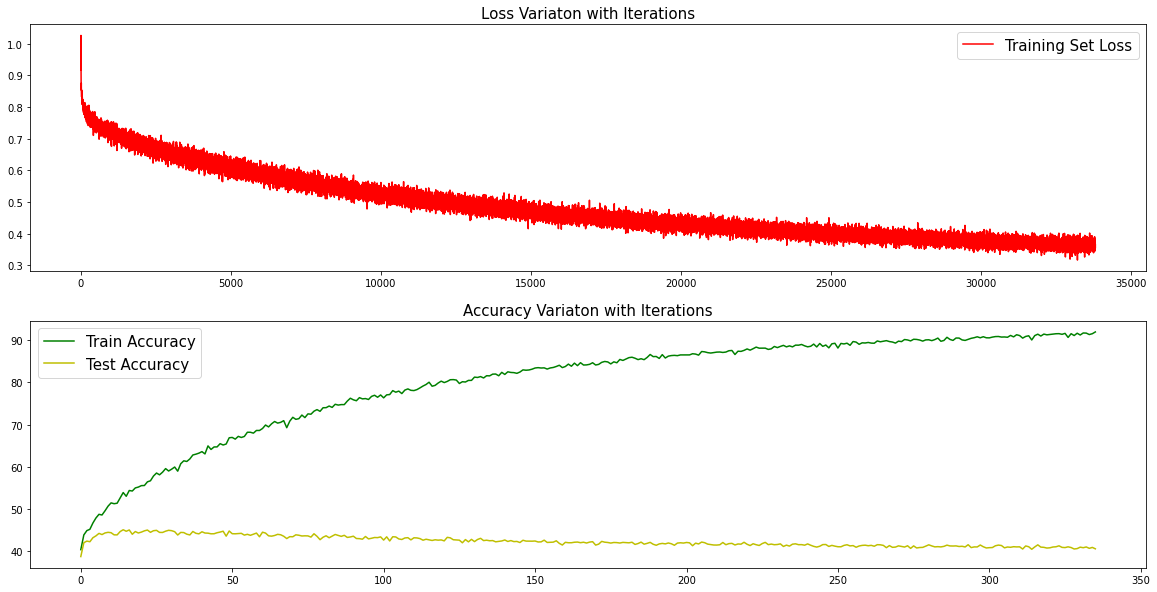

In [19]:
# Visualizing the loss/accuracy variation over iterations

fig,ax = plt.subplots(2,1,figsize=(20,10))

ax[0].plot(loss_history_st,color="r")
#ax[0].plot(loss_history_st_test,color="b")
ax[0].set_title('Loss Variaton with Iterations',fontsize= 15)
ax[0].legend(['Training Set Loss','Test Set Loss'],fontsize= 15)

ax[1].plot(train_acc_history_st,color="g")
ax[1].plot(val_acc_history_st,color="y")
ax[1].set_title('Accuracy Variaton with Iterations',fontsize= 15)
ax[1].legend(['Train Accuracy','Test Accuracy'],fontsize= 15)

plt.savefig("Img_a4/SGD2History.tif")

In [14]:
# Less iterations
iterations = 15
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(1,iterations+1):
    indices = np.arange(Ntr)
    rng.shuffle(indices)

    # Forward pass
    Xs = x_train[indices]
    Ys = y_train[indices]

    for iter in range(batch_iter):
        batch = Xs[batchsize*iter:batchsize*(iter+1)]
        batchy = Ys[batchsize*iter:batchsize*(iter+1)] 

        h = sigmoid(np.matmul(batch,w_s1)+b_s1)
        y_b = ForwardProp(h,w_s2,b_s2)

        loss_s = LinearLoss(y_b,batchy,w_s1,reg,w_s2)
        loss_history_st.append(loss_s)

        # Backward pass
        dws1,dbs1,dws2,dbs2 = BackProp(batch,batchy,y_b,True,w_s1,w_s2,h) 

        # Perform Gradient Descent
        w_s1,b_s1,lr = GradDescent(w_s1,b_s1,dws1,dbs1,lr,lr_decay)
        lr /= lr_decay
        w_s2,b_s2,lr = GradDescent(w_s2,b_s2,dws2,dbs2,lr,lr_decay)
        lr /= lr_decay

        # Train set
        h = sigmoid(np.matmul(Xs,w_s1)+b_s1)
        y_st = ForwardProp(h,w_s2,b_s2)    
    
        # Test set 
        h_t = sigmoid(np.matmul(x_test,w_s1)+b_s1)
        y_stt = ForwardProp(h_t,w_s2,b_s2) 

        # Update history
        train_acc_history_st.append(Accuracy(Ys,y_st))
        val_acc_history_st.append(Accuracy(y_test,y_stt))
    
    lr *= lr_decay

    print('iterations \t:',t,'---------- loss',loss_s)

KeyboardInterrupt: 

In [12]:
# Printing accuracies and losses

print("Learning Rate:", lr)
print("Training Set Loss For SGD:", loss_history_st[-1])
#print("Test Set Loss For SGD:", loss_history_st_test[-1])
print("Train Accuracy For SGD:",train_acc_history_st[-1])
print("Test Accuracy For SGD:",val_acc_history_st[-1])

Learning Rate: 0.01379146364906803
Training Set Loss For SGD: 0.6832388237987608
Train Accuracy For SGD: 52.948
Test Accuracy For SGD: 44.6


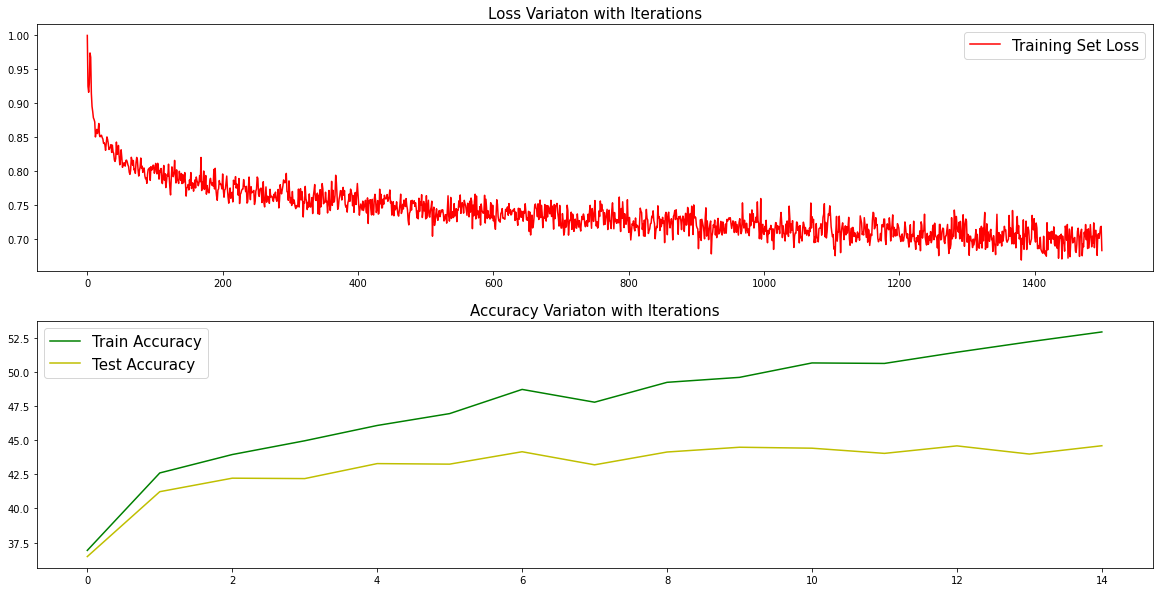

In [13]:
# Visualizing the loss/accuracy variation over iterations

fig,ax = plt.subplots(2,1,figsize=(20,10))

ax[0].plot(loss_history_st,color="r")
#ax[0].plot(loss_history_st_test,color="b")
ax[0].set_title('Loss Variaton with Iterations',fontsize= 15)
ax[0].legend(['Training Set Loss','Test Set Loss'],fontsize= 15)

ax[1].plot(train_acc_history_st,color="g")
ax[1].plot(val_acc_history_st,color="y")
ax[1].set_title('Accuracy Variaton with Iterations',fontsize= 15)
ax[1].legend(['Train Accuracy','Test Accuracy'],fontsize= 15)

plt.savefig("Img_a4/SGD2History.tif")

# 4. CNN

In [57]:
from tensorflow.keras import layers,models

In [58]:
# Download the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape,'\n')

# Classes
K = len(np.unique(y_train)) 

# Data Parameters
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

# Covert labels to binary classes
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)


x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1) 



In [59]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))

model.add(layers.Dense(10,activation='softmax'))


In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)              

In [61]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

fitted = model.fit(x_train,y_train,epochs=50,batch_size=50)


Epoch 1/50
1000/1000 [==============================] - 75s 58ms/step - loss: 1.8924 - accuracy: 0.2998
Epoch 2/50
1000/1000 [==============================] - 56s 56ms/step - loss: 1.2906 - accuracy: 0.5388
Epoch 3/50
1000/1000 [==============================] - 56s 56ms/step - loss: 1.0813 - accuracy: 0.6179
Epoch 4/50
1000/1000 [==============================] - 59s 59ms/step - loss: 0.9464 - accuracy: 0.6674
Epoch 5/50
1000/1000 [==============================] - 59s 59ms/step - loss: 0.8324 - accuracy: 0.7110
Epoch 6/50
1000/1000 [==============================] - 61s 61ms/step - loss: 0.7625 - accuracy: 0.7331
Epoch 7/50
1000/1000 [==============================] - 65s 65ms/step - loss: 0.7018 - accuracy: 0.7532
Epoch 8/50
1000/1000 [==============================] - 57s 57ms/step - loss: 0.6514 - accuracy: 0.7726
Epoch 9/50
1000/1000 [==============================] - 60s 60ms/step - loss: 0.6068 - accuracy: 0.7871
Epoch 10/50
1000/1000 [==============================] - 59s 59m

313/313 - 2s - loss: 1.9152 - accuracy: 0.6925
Accuracy : 69.24999952316284


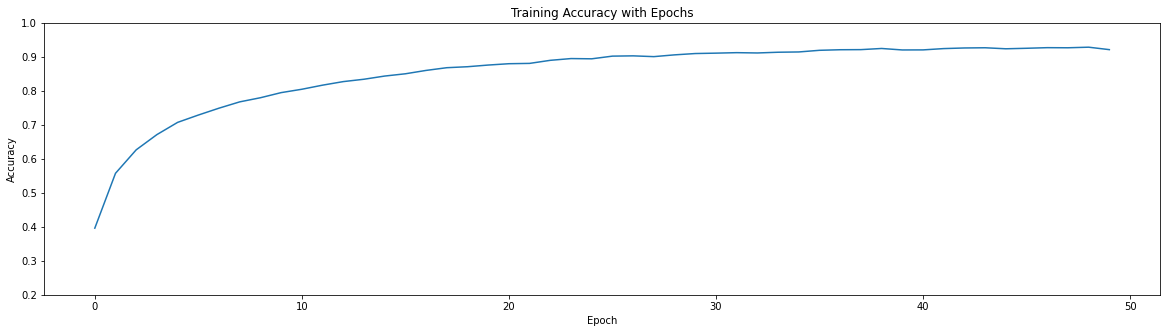

In [63]:
plt.figure(figsize=(20,5))
plt.title("Training Accuracy with Epochs")
plt.plot(fitted.history['accuracy'],label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2,1])

plt.savefig("Img_a4/CNNHistory.tif")

loss_test , accuracy_test = model.evaluate(x_test,y_test,verbose=2)
print('Accuracy :',accuracy_test*100.0)


In [64]:
pred = model.predict(x_test)
print(Accuracy(y_test,pred))

69.25
